In [0]:
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'].insert(0, 'AppleGothic') 

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing

## 성연령유동 : flow_sexage

In [0]:
flow_all = pd.DataFrame()
for i in [804, 805, 806, 807, 808, 809, 810, 811, 812, 901, 902, 903]:
    filepath = '/Users/Neun/Desktop/bigcon/innovation/유동인구데이터/성연령유동/노원_종로_FLOW_AGE_201{}.CSV'.format(i)
    temp = pd.read_csv(filepath, delimiter = '|')
    flow_all = pd.concat([flow_all, temp], axis=0, ignore_index=True)
    
flow_all.columns = [i for i in  flow_all.columns if '_FLOW_POP_CNT' not in i] + [re.sub('_FLOW_POP_CNT', '', i) for i in  flow_all.columns if '_FLOW_POP_CNT' in i]

flow_all['STD_YMD'] = pd.to_datetime(flow_all['STD_YMD'], format = '%Y%m%d')
flow_all['MON'] = [i.month for i in flow_all['STD_YMD']]

In [0]:
flow_all.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_0004,MAN_0509,MAN_1014,MAN_1519,MAN_2024,MAN_2529,...,WMAN_3034,WMAN_3539,WMAN_4044,WMAN_4549,WMAN_5054,WMAN_5559,WMAN_6064,WMAN_6569,WMAN_70U,MON
0,201804,2018-04-01,1111051500,청운효자동,0.05,78.93,403.26,642.66,984.24,1792.30,...,1356.08,1598.14,1495.53,1768.21,1611.47,1433.06,1212.56,549.45,811.56,4
1,201804,2018-04-01,1111053000,사직동,1.25,262.54,1207.22,2177.88,4076.89,6887.72,...,5743.10,5817.91,5429.89,6104.03,4998.93,4826.11,4207.45,2160.84,2972.08,4
2,201804,2018-04-01,1111054000,삼청동,0.00,78.07,255.24,331.09,654.32,1264.86,...,1183.11,1234.88,1157.69,1186.72,985.11,844.26,744.60,359.03,421.64,4
3,201804,2018-04-01,1111055000,부암동,0.00,228.50,753.31,981.54,1615.77,2732.00,...,2431.23,3028.24,2944.28,3532.23,3075.55,2785.22,2223.72,1118.48,1498.65,4
4,201804,2018-04-01,1111056000,평창동,0.00,354.38,1500.63,1963.08,2593.07,4927.24,...,4598.39,5661.53,5526.94,7075.02,6899.55,6886.22,5336.01,2629.75,3820.41,4


In [0]:
flow_sexage = flow_all.pivot_table(index = ['HDONG_NM', 'MON'], values = ['MAN_0004',
'MAN_0509', 'MAN_1014', 'MAN_1519', 'MAN_2024',
'MAN_2529', 'MAN_3034', 'MAN_3539', 'MAN_4044',
'MAN_4549', 'MAN_5054', 'MAN_5559', 'MAN_6064',
'MAN_6569', 'MAN_70U', 'WMAN_0004', 'WMAN_0509',
'WMAN_1014', 'WMAN_1519', 'WMAN_2024', 'WMAN_2529',
'WMAN_3034', 'WMAN_3539', 'WMAN_4044', 'WMAN_4549',
'WMAN_5054', 'WMAN_5559', 'WMAN_6064', 'WMAN_6569',
'WMAN_70U'], aggfunc = 'mean')
flow_sexage = flow_sexage.unstack(level=1)


In [0]:
flow_sexage.head()

MAN_0004                                                    \
MON             1         2         3         4         5         6    
HDONG_NM                                                               
가회동       0.340000  0.671429  0.350645  0.289333  0.113548  0.228667   
공릉1동      0.489032  0.573929  0.366129  0.146333  0.169677  0.201667   
공릉2동      0.016452  0.111071  0.018387  0.104333  0.265484  0.144333   
교남동       0.324516  0.639643  0.993226  0.100000  0.062903  0.274333   
무악동       0.093226  0.016786  0.258387  0.032000  0.012581  0.342333   

                                                  ...     WMAN_70U  \
MON             7         8         9         10  ...           3    
HDONG_NM                                          ...                
가회동       0.232581  0.149355  0.111333  0.327742  ...   522.112258   
공릉1동      0.151935  0.301290  1.307333  1.907742  ...  4359.319677   
공릉2동      1.168065  1.498387  1.369000  2.542258  ...  3707.869032   
교남동       0.277097  0.200323  0.216000  0.455806  ...   937.241613   
무악동       0.084516  0.238710  0.165000  0.335806  ...   878.225806   

                                                                           \
MON                4            5            6            7            8    
HDONG_NM                                                                    
가회동        461.121667   439.628710   405.620000   361.117742   353.627742   
공릉1동      3960.336333  4073.792258  3799.567333  3858.367097  3709.640323   
공릉2동      3053.356000  3157.066774  2927.299667  2791.555806  2622.874839   
교남동        906.346000   900.824194   879.741333   857.251290   753.926129   
무악동        675.677333   705.153871   622.126667   588.643226   573.692581   

                                                              
MON                9            10           11           12  
HDONG_NM                                                      
가회동        396.272333   440.602258   273.193333   434.292581  
공릉1동      3980.988000  4109.438387  4017.030333  2247.807419  
공릉2동      3211.372333  3350.914839  3185.554333  1592.450323  
교남동        795.465000   859.710645   843.224333   888.863548  
무악동        616.634333   671.323548   614.979667   636.937097  

[5 rows x 360 columns]

In [0]:
flow_sexage.columns = [str(j) + '월_'+ i for i, j in flow_sexage.columns]

In [0]:
flow_sexage.head()

,1월_MAN_0004,2월_MAN_0004,3월_MAN_0004,4월_MAN_0004,5월_MAN_0004,6월_MAN_0004,7월_MAN_0004,8월_MAN_0004,9월_MAN_0004,10월_MAN_0004,...,3월_WMAN_70U,4월_WMAN_70U,5월_WMAN_70U,6월_WMAN_70U,7월_WMAN_70U,8월_WMAN_70U,9월_WMAN_70U,10월_WMAN_70U,11월_WMAN_70U,12월_WMAN_70U
HDONG_NM,,,,,,,,,,,,,,,,,,,,,
가회동,0.340000,0.671429,0.350645,0.289333,0.113548,0.228667,0.232581,0.149355,0.111333,0.327742,...,522.112258,461.121667,439.628710,405.620000,361.117742,353.627742,396.272333,440.602258,273.193333,434.292581
공릉1동,0.489032,0.573929,0.366129,0.146333,0.169677,0.201667,0.151935,0.301290,1.307333,1.907742,...,4359.319677,3960.336333,4073.792258,3799.567333,3858.367097,3709.640323,3980.988000,4109.438387,4017.030333,2247.807419
공릉2동,0.016452,0.111071,0.018387,0.104333,0.265484,0.144333,1.168065,1.498387,1.369000,2.542258,...,3707.869032,3053.356000,3157.066774,2927.299667,2791.555806,2622.874839,3211.372333,3350.914839,3185.554333,1592.450323
교남동,0.324516,0.639643,0.993226,0.100000,0.062903,0.274333,0.277097,0.200323,0.216000,0.455806,...,937.241613,906.346000,900.824194,879.741333,857.251290,753.926129,795.465000,859.710645,843.224333,888.863548
무악동,0.093226,0.016786,0.258387,0.032000,0.012581,0.342333,0.084516,0.238710,0.165000,0.335806,...,878.225806,675.677333,705.153871,622.126667,588.643226,573.692581,616.634333,671.323548,614.979667,636.937097


## 주민등록인구 : people_togroup

In [0]:
# 주민등록인구 데이터 적재
# 1. 구별 소계, 성별 소계 삭제
# 2. 종로구, 노원구만 남김

people = pd.read_excel('/Users/Neun/Desktop/bigcon/innovation/외부데이터/주민등록인구/2018_주민등록인구.xls', skiprows = [1,2,3])
people = people.drop(people.index[(people['동'] == '소계') | (people['구분'] == '계')])
people = people[people['자치구'].isin(['종로구', '노원구'])].drop('기간', axis = 1)
people.drop('자치구', axis = 1, inplace =True)
people.head()

,동,구분,계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상+
4,사직동,남자,4108.0,157.5,197.5,173.5,190.5,215.5,292.0,305.0,...,328.0,270.5,182.5,163.5,155.5,108.5,40.5,17.5,2.5,1
5,사직동,여자,4920.0,150.0,181.0,186.5,210.5,277.0,329.0,373.5,...,380.0,313.5,234.5,198.5,197.0,148.0,68.5,25,9.5,2
7,삼청동,남자,1276.5,29.5,42.5,56.0,70.0,76.0,91.0,81.0,...,108.5,93.5,74.5,59.0,54.0,28.0,18.5,6,2,-
8,삼청동,여자,1434.0,33.0,38.0,44.0,52.0,97.0,85.5,95.0,...,130.5,105.5,74.0,79.0,77.5,54.0,26.0,9.5,3,2
10,부암동,남자,4772.5,120.0,200.5,242.5,277.5,387.0,381.5,269.0,...,392.5,315.5,209.5,196.5,160.0,98.5,46.5,10.5,2,-


In [0]:
people_man = people[people['구분'] == '남자'].drop('계', axis = 1)
people_woman = people[people['구분'] == '여자'].drop('계', axis = 1)

In [0]:
people_man.columns

Index(['동', '구분', '0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세',
       '30~34세', '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세',
       '65~69세', '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세',
       '100세 이상+'],
      dtype='object')

In [0]:
colnames =['동', '구분'] + ['남_주민_' + i.split('~')[0] for i in people_man.columns[2:]]
# colnames
people_man.columns = colnames
colnames =['동', '구분'] + ['여_주민_' + i.split('~')[0] for i in people_woman.columns[2:]]
people_woman.columns = colnames

people_man.columns

Index(['동', '구분', '남_주민_0', '남_주민_5', '남_주민_10', '남_주민_15', '남_주민_20',
       '남_주민_25', '남_주민_30', '남_주민_35', '남_주민_40', '남_주민_45', '남_주민_50',
       '남_주민_55', '남_주민_60', '남_주민_65', '남_주민_70', '남_주민_75', '남_주민_80',
       '남_주민_85', '남_주민_90', '남_주민_95', '남_주민_100세 이상+'],
      dtype='object')

In [0]:
people_togroup = pd.merge(people_woman, people_man, on = '동')
people_togroup.drop(['구분_x', '구분_y'],axis=1, inplace=True)
people_togroup.head()

,동,여_주민_0,여_주민_5,여_주민_10,여_주민_15,여_주민_20,여_주민_25,여_주민_30,여_주민_35,여_주민_40,...,남_주민_55,남_주민_60,남_주민_65,남_주민_70,남_주민_75,남_주민_80,남_주민_85,남_주민_90,남_주민_95,남_주민_100세 이상+
0,사직동,150.0,181.0,186.5,210.5,277.0,329.0,373.5,405.0,408.5,...,328.0,270.5,182.5,163.5,155.5,108.5,40.5,17.5,2.5,1
1,삼청동,33.0,38.0,44.0,52.0,97.0,85.5,95.0,119.5,84.5,...,108.5,93.5,74.5,59.0,54.0,28.0,18.5,6,2,-
2,부암동,114.5,153.5,196.5,266.5,320.5,310.0,307.5,367.5,400.5,...,392.5,315.5,209.5,196.5,160.0,98.5,46.5,10.5,2,-
3,평창동,285.0,331.5,371.0,546.5,702.5,583.0,551.0,675.5,686.5,...,783.0,603.0,399.5,294.0,287.0,171.0,76.0,21,6.5,1.5
4,무악동,152.0,224.0,247.5,295.0,264.5,222.5,199.5,295.5,359.0,...,313.5,236.0,158.5,126.5,109.5,69.5,26.5,6,1,-


In [0]:
people_togroup['여_주민_90'] = people_togroup['여_주민_90'].replace('-', 0)
people_togroup['여_주민_95'] = people_togroup['여_주민_95'].replace('-', 0)
people_togroup['여_주민_100세 이상+'] = people_togroup['여_주민_100세 이상+'].replace('-', 0)

people_togroup['남_주민_90'] = people_togroup['남_주민_90'].replace('-', 0)
people_togroup['남_주민_95'] = people_togroup['남_주민_95'].replace('-', 0)
people_togroup['남_주민_100세 이상+'] = people_togroup['남_주민_100세 이상+'].replace('-', 0)

people_togroup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 43 columns):
동                36 non-null object
여_주민_0           36 non-null float64
여_주민_5           36 non-null float64
여_주민_10          36 non-null float64
여_주민_15          36 non-null float64
여_주민_20          36 non-null float64
여_주민_25          36 non-null float64
여_주민_30          36 non-null float64
여_주민_35          36 non-null float64
여_주민_40          36 non-null float64
여_주민_45          36 non-null float64
여_주민_50          36 non-null float64
여_주민_55          36 non-null float64
여_주민_60          36 non-null float64
여_주민_65          36 non-null float64
여_주민_70          36 non-null float64
여_주민_75          36 non-null float64
여_주민_80          36 non-null float64
여_주민_85          36 non-null float64
여_주민_90          36 non-null float64
여_주민_95          36 non-null float64
여_주민_100세 이상+    36 non-null float64
남_주민_0           36 non-null float64
남_주민_5           36 non-null float64
남_주민_10   

## 시간대별 유동인구 : flow_time

In [0]:
flow_all = pd.DataFrame()
for i in [804, 805, 806, 807, 808, 809, 810, 811, 812, 901, 902, 903]:
    filepath = '/Users/Neun/Desktop/bigcon/innovation/유동인구데이터/시간대유동/노원_종로_FLOW_TIME_201{}.CSV'.format(i)
    temp = pd.read_csv(filepath, delimiter = '|')
    flow_all = pd.concat([flow_all, temp], axis=0, ignore_index=True)
    
flow_all.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,201804,20180401,1111051500,청운효자동,609.11,447.82,301.75,217.03,237.07,318.75,...,3097.34,2550.96,2464.35,2327.44,1933.71,1597.47,1331.83,1231.07,1041.82,624.62
1,201804,20180401,1111053000,사직동,1904.32,1319.04,951.80,779.08,779.14,1355.75,...,10166.17,9179.66,8899.18,8318.59,7009.69,5750.79,5137.36,4532.06,3589.93,2308.88
2,201804,20180401,1111054000,삼청동,216.30,158.05,91.13,85.30,86.76,146.87,...,2361.17,2126.52,1998.35,1794.76,1281.02,1059.50,875.79,691.84,433.89,229.83
3,201804,20180401,1111055000,부암동,1300.61,904.38,670.74,433.02,571.34,771.25,...,5155.72,4888.78,5111.07,5067.47,4148.24,3502.62,3217.30,2925.42,2374.94,1382.12
4,201804,20180401,1111056000,평창동,2523.88,2168.69,1672.82,1300.87,1400.14,1686.09,...,10460.65,9539.91,8973.38,7940.15,6992.54,6460.50,5661.25,5210.50,4416.75,3060.66


In [0]:
flow_all['STD_YMD'] = pd.to_datetime(flow_all['STD_YMD'], format = '%Y%m%d')
flow_all['MON'] = [i.month for i in flow_all['STD_YMD']]

In [0]:
flow_all.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,MON
0,201804,2018-04-01,1111051500,청운효자동,609.11,447.82,301.75,217.03,237.07,318.75,...,2550.96,2464.35,2327.44,1933.71,1597.47,1331.83,1231.07,1041.82,624.62,4
1,201804,2018-04-01,1111053000,사직동,1904.32,1319.04,951.80,779.08,779.14,1355.75,...,9179.66,8899.18,8318.59,7009.69,5750.79,5137.36,4532.06,3589.93,2308.88,4
2,201804,2018-04-01,1111054000,삼청동,216.30,158.05,91.13,85.30,86.76,146.87,...,2126.52,1998.35,1794.76,1281.02,1059.50,875.79,691.84,433.89,229.83,4
3,201804,2018-04-01,1111055000,부암동,1300.61,904.38,670.74,433.02,571.34,771.25,...,4888.78,5111.07,5067.47,4148.24,3502.62,3217.30,2925.42,2374.94,1382.12,4
4,201804,2018-04-01,1111056000,평창동,2523.88,2168.69,1672.82,1300.87,1400.14,1686.09,...,9539.91,8973.38,7940.15,6992.54,6460.50,5661.25,5210.50,4416.75,3060.66,4


In [0]:
flow_all.columns

Index(['STD_YM', 'STD_YMD', 'HDONG_CD', 'HDONG_NM', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23', 'MON'],
      dtype='object')

In [0]:
flow_time = flow_all.pivot_table(index = ['HDONG_NM', 'MON'], values = ['TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23'], aggfunc = 'mean')
flow_time = flow_time.unstack(level = 1)
flow_time

TMST_00                                                      \
MON                   1            2            3            4            5    
HDONG_NM                                                                       
가회동           229.309032   211.091786   203.006129   248.580667   207.617419   
공릉1동         2751.911613  2821.009286  2932.070968  3743.278667  3806.964194   
공릉2동         2564.876774  2578.220714  2958.868065  2956.268333  3150.519032   
교남동           423.744516   386.085714   447.769355   486.839667   506.863226   
무악동           283.042581   276.856786   300.178065   332.704000   341.957097   
부암동           787.455484   749.933571   805.933548  1164.749000  1160.367419   
사직동          1252.261935  1199.714286  1496.249032  2017.992000  1957.037097   
삼청동           458.562258   382.968571   172.466774   215.922667   214.171613   
상계10동         727.714194   697.556071   702.929677   773.572000   869.774516   
상계1동         1655.078065  1657.126786  1798.956452  2126.352667  2186.365806   
상계2동         1140.285484  1099.867143  1142.240968  1574.155333  1684.811613   
상계3.4동        954.061290   992.397857   943.770968  1198.253667  1262.296129   
상계5동          597.882581   605.994286   622.163871   787.818333   836.293226   
상계6.7동       2389.110968  2319.380714  2328.045806  3223.207333  3321.363548   
상계8동         1500.068065  1386.435000  1259.425484  1074.437000  1155.692581   
상계9동          623.351290   608.392143   566.377097   662.523667   749.740968   
숭인1동          245.274839   237.260357   242.945806   401.322667   395.391613   
숭인2동          992.738387   883.758929   935.228710  1135.127667  1159.182903   
월계1동          906.814839   893.610357   932.178387  1361.176667  1454.559032   
월계2동          790.000323   765.832500   845.800645  1090.328333  1195.446129   
월계3동         1603.558710  1566.979286  1684.392258  2101.734000  2159.908065   
이화동           624.254839   569.679643   644.733871   760.315667   799.060968   
종로1.2.3.4가동  3320.911613  3204.890714  3510.301935  4020.438333  4161.420645   
종로5.6가동      1166.034194  1033.158929  1165.596452  1394.514000  1450.425806   
중계1동          736.813871   710.980000   706.277419   842.510000   941.078710   
중계2.3동       1109.118710  1091.644643  1119.818710  1508.065667  1540.672581   
중계4동          767.600968   763.390000   763.190323   796.599000   883.402258   
중계본동          906.561613   862.878929   844.540645   660.745000   755.225161   
창신1동          764.278710   719.320357   793.024516   862.459667   894.931613   
창신2동          169.811613   159.072857   184.418065   200.516667   203.214516   
창신3동          161.914516   149.701786   149.713548   188.230000   195.649677   
청운효자동         485.242581   484.844286   522.739355   559.097333   593.232903   
평창동          2240.355806  2161.175000  2221.026129  2610.187667  2788.088710   
하계1동         1165.159677  1138.656429  1270.123871  1453.456333  1483.588387   
하계2동          987.615161   969.435714  1007.877097  1269.123000  1355.063226   
혜화동          1035.826452   960.362143  1058.200645  1501.096333  1503.150323   

                                                                              \
MON                   6            7            8            9            10   
HDONG_NM                                                                       
가회동           202.966333   192.656452   175.615806   173.451000   158.860968   
공릉1동         3528.430667  3481.732581  3054.653548  3149.514000  3042.586452   
공릉2동         2850.619000  2520.445484  2170.676452  2960.691667  2918.289677   
교남동           513.667000   491.360645   426.141935   418.695000   417.049355   
무악동           338.047667   318.999677   264.981935   262.170333   249.344516   
부암동          1168.841000  1090.796774  1015.349355  1000.798667   981.429355   
사직동          2081.245000  1967.128065  1712.999032  1672.406333  1662.167097   
삼청동           210.028667   199.403226   173.249355   172.674333   169.143548   
상계10동        111

In [0]:
flow_time.columns = [str(j) + '월_'+ i for i, j in flow_time.columns]
flow_time.head()

,1월_TMST_00,2월_TMST_00,3월_TMST_00,4월_TMST_00,5월_TMST_00,6월_TMST_00,7월_TMST_00,8월_TMST_00,9월_TMST_00,10월_TMST_00,...,3월_TMST_23,4월_TMST_23,5월_TMST_23,6월_TMST_23,7월_TMST_23,8월_TMST_23,9월_TMST_23,10월_TMST_23,11월_TMST_23,12월_TMST_23
HDONG_NM,,,,,,,,,,,,,,,,,,,,,
가회동,229.309032,211.091786,203.006129,248.580667,207.617419,202.966333,192.656452,175.615806,173.451000,158.860968,...,326.187097,400.693000,352.275161,338.939667,328.467097,289.173226,271.934000,261.372581,167.397667,285.361935
공릉1동,2751.911613,2821.009286,2932.070968,3743.278667,3806.964194,3528.430667,3481.732581,3054.653548,3149.514000,3042.586452,...,4824.052581,6566.188667,6276.360645,5945.831000,5956.988065,5116.900323,5073.772667,5046.793548,5080.536667,2698.212581
공릉2동,2564.876774,2578.220714,2958.868065,2956.268333,3150.519032,2850.619000,2520.445484,2170.676452,2960.691667,2918.289677,...,4494.662903,4590.029333,4802.933226,4434.342000,3977.727097,3411.243548,4184.329000,4304.951935,4179.250667,2029.466452
교남동,423.744516,386.085714,447.769355,486.839667,506.863226,513.667000,491.360645,426.141935,418.695000,417.049355,...,708.065161,849.287333,856.283871,864.795333,844.979677,702.704516,672.133667,690.844516,704.279333,781.396452
무악동,283.042581,276.856786,300.178065,332.704000,341.957097,338.047667,318.999677,264.981935,262.170333,249.344516,...,552.070968,730.538000,778.656774,643.355667,621.800968,510.452903,481.224000,488.646129,478.889000,518.472903


## 상권정보

In [0]:
business = pd.read_csv('/Users/Neun/Desktop/bigcon/innovation/외부데이터/2017사업체현황.csv', encoding = 'cp949')
business.head()

,자치구,동,농업 임업 및 어업_사업체수,농업 임업 및 어업_종사자수,광업_사업체수,광업_종사자수,제조업_사업체수,제조업_종사자수,전기 가스 증기 및 공기조절 공급업_사업체수,전기 가스 증기 및 공기조절 공급업_종사자수,...,공공행정 국방 및 사회보장 행정_사업체수,공공행정 국방 및 사회보장 행정_종사자수,교육 서비스업_사업체수,교육 서비스업_종사자수,보건업 및 사회복지 서비스업_사업체수,보건업 및 사회복지 서비스업_종사자수,예술 스포츠 및 여가관련 서비스업_사업체수,예술 스포츠 및 여가관련 서비스업_종사자수,협회 및 단체 수리 및 기타 개인 서비스업_사업체수,협회 및 단체 수리 및 기타 개인 서비스업_종사자수
0,종로구,사직동,1,16,0,0,72,217,1,8,...,19,7667,86,898,97,764,95,1546,250,920
1,종로구,삼청동,0,0,0,0,16,82,0,0,...,4,1229,16,279,7,28,17,172,27,216
2,종로구,부암동,0,0,1,5,24,122,0,0,...,3,58,43,1543,12,153,15,73,94,806
3,종로구,평창동,0,0,0,0,15,101,0,0,...,3,77,60,661,34,385,32,167,114,303
4,종로구,무악동,0,0,0,0,6,11,0,0,...,1,14,24,174,10,469,5,14,49,95


## 세대원수별 세대수

In [0]:
house = pd.read_csv('/Users/Neun/Desktop/bigcon/innovation/외부데이터/세대원수별세대수_2018.csv')
house.head()

,GU,DONG,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대
0,종로구,청운효자동,1946.5,1110.0,1020.5,993.0,251.5,77.0,20.5,5.5,3.0,0.0
1,종로구,사직동,2116.0,870.5,685.5,577.0,159.5,34.0,22.0,8.0,0.5,3.5
2,종로구,삼청동,735.5,247.0,195.0,151.5,57.5,18.0,6.5,1.0,0.0,0.0
3,종로구,부암동,1628.5,928.0,737.0,737.0,201.0,56.5,23.0,5.5,2.5,2.0
4,종로구,평창동,2420.5,1622.5,1473.5,1450.5,423.5,100.5,25.0,9.5,6.5,2.0


In [0]:
hb_map = pd.DataFrame(zip(house['DONG'].sort_values().reset_index(drop =  True), business['동'].sort_values().reset_index(drop = True)), columns = ['house', 'business'])

In [0]:
hb_map.head()

,house,business
0,가회동,가회동
1,공릉1동,공릉1동
2,공릉2동,공릉2동
3,교남동,교남동
4,무악동,무악동


In [0]:
new_dong = []

for i in house['DONG']:
    for h, b in hb_map.values:
        if i == h:
            new_dong.append(b)
house['NEW_DONG'] = new_dong
house

,GU,DONG,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대,NEW_DONG
0,종로구,청운효자동,1946.5,1110.0,1020.5,993.0,251.5,77.0,20.5,5.5,3.0,0.0,청운효자동
1,종로구,사직동,2116.0,870.5,685.5,577.0,159.5,34.0,22.0,8.0,0.5,3.5,사직동
2,종로구,삼청동,735.5,247.0,195.0,151.5,57.5,18.0,6.5,1.0,0.0,0.0,삼청동
3,종로구,부암동,1628.5,928.0,737.0,737.0,201.0,56.5,23.0,5.5,2.5,2.0,부암동
4,종로구,평창동,2420.5,1622.5,1473.5,1450.5,423.5,100.5,25.0,9.5,6.5,2.0,평창동
5,종로구,무악동,705.0,646.0,679.0,755.0,181.5,33.5,7.5,2.0,0.5,2.0,무악동
6,종로구,교남동,1593.0,1077.5,853.0,765.5,157.0,34.5,13.5,5.5,1.0,0.0,교남동
7,종로구,가회동,924.0,439.0,326.5,269.5,79.5,22.5,8.0,1.5,0.5,0.5,가회동
8,종로구,종로1.2.3.4가동,4185.0,535.0,306.5,223.5,54.0,15.5,6.0,3.0,0.0,0.0,종로1.2.3.4가동
9,종로구,종로5.6가동,2050.5,477.5,318.0,216.5,68.0,12.5,3.0,1.5,1.5,0.0,종로5·6가동


In [0]:
house_busi = pd.merge(house, business, left_on = 'NEW_DONG', right_on = '동')
len(house_busi)

36

### flow_sexage : 성연령유동
### flow_time : 시간대유동
### people_togroup : 주민등록인구
### house_busi : 세대원수 별 세대수 & 업종별 사업체수 / 종사자수

In [0]:
flow_sexage.reset_index(inplace = True)
flow_time.reset_index(inplace = True)

In [0]:
flow = pd.merge(flow_time, flow_sexage, on = 'HDONG_NM')

In [0]:
sorted(flow['HDONG_NM'].unique())

['가회동',
 '공릉1동',
 '공릉2동',
 '교남동',
 '무악동',
 '부암동',
 '사직동',
 '삼청동',
 '상계10동',
 '상계1동',
 '상계2동',
 '상계3.4동',
 '상계5동',
 '상계6.7동',
 '상계8동',
 '상계9동',
 '숭인1동',
 '숭인2동',
 '월계1동',
 '월계2동',
 '월계3동',
 '이화동',
 '종로1.2.3.4가동',
 '종로5.6가동',
 '중계1동',
 '중계2.3동',
 '중계4동',
 '중계본동',
 '창신1동',
 '창신2동',
 '창신3동',
 '청운효자동',
 '평창동',
 '하계1동',
 '하계2동',
 '혜화동']

In [0]:
people_togroup['동'].unique()

array(['사직동', '삼청동', '부암동', '평창동', '무악동', '교남동', '가회동', '종로1.2.3.4가동',
       '종로5·6가동', '이화동', '창신1동', '창신2동', '창신3동', '숭인1동', '숭인2동', '청운효자동',
       '혜화동', '월계1동', '월계2동', '월계3동', '공릉2동', '하계1동', '하계2동', '중계본동',
       '중계1동', '중계4동', '상계1동', '상계2동', '상계5동', '상계8동', '상계9동', '상계10동',
       '상계3.4동', '상계6.7동', '중계2.3동', '공릉1동'], dtype=object)

In [0]:
flow_people_map = pd.DataFrame(zip(sorted(flow['HDONG_NM'].unique()), sorted(people_togroup['동'].unique())), columns = ['flow', 'people'])
flow_people_map

,flow,people
0,가회동,가회동
1,공릉1동,공릉1동
2,공릉2동,공릉2동
3,교남동,교남동
4,무악동,무악동
5,부암동,부암동
6,사직동,사직동
7,삼청동,삼청동
8,상계10동,상계10동
9,상계1동,상계1동


In [0]:
new_dong = []

for i in people_togroup['동']:
    for f, p in flow_people_map.values:
        if i == p:
            new_dong.append(f)
people_togroup['NEW_DONG'] = new_dong
people_togroup

,동,여_주민_0,여_주민_5,여_주민_10,여_주민_15,여_주민_20,여_주민_25,여_주민_30,여_주민_35,여_주민_40,...,남_주민_60,남_주민_65,남_주민_70,남_주민_75,남_주민_80,남_주민_85,남_주민_90,남_주민_95,남_주민_100세 이상+,NEW_DONG
0,사직동,150.0,181.0,186.5,210.5,277.0,329.0,373.5,405.0,408.5,...,270.5,182.5,163.5,155.5,108.5,40.5,17.5,2.5,1.0,사직동
1,삼청동,33.0,38.0,44.0,52.0,97.0,85.5,95.0,119.5,84.5,...,93.5,74.5,59.0,54.0,28.0,18.5,6.0,2.0,0.0,삼청동
2,부암동,114.5,153.5,196.5,266.5,320.5,310.0,307.5,367.5,400.5,...,315.5,209.5,196.5,160.0,98.5,46.5,10.5,2.0,0.0,부암동
3,평창동,285.0,331.5,371.0,546.5,702.5,583.0,551.0,675.5,686.5,...,603.0,399.5,294.0,287.0,171.0,76.0,21.0,6.5,1.5,평창동
4,무악동,152.0,224.0,247.5,295.0,264.5,222.5,199.5,295.5,359.0,...,236.0,158.5,126.5,109.5,69.5,26.5,6.0,1.0,0.0,무악동
5,교남동,228.5,219.0,212.0,236.5,309.5,427.0,456.5,509.5,475.5,...,262.0,169.0,142.0,147.5,65.0,17.5,7.0,0.0,0.0,교남동
6,가회동,45.5,75.0,74.5,110.0,120.5,156.0,147.5,154.0,191.0,...,128.0,103.5,92.5,78.5,38.5,21.0,5.0,1.0,0.0,가회동
7,종로1.2.3.4가동,54.5,50.5,41.5,95.5,254.5,199.0,196.5,178.5,152.5,...,462.5,320.0,227.5,190.5,89.5,27.5,8.5,7.0,0.5,종로1.2.3.4가동
8,종로5·6가동,26.5,39.5,63.0,94.0,192.5,224.0,149.5,96.5,109.5,...,218.0,143.0,147.0,115.0,51.5,17.0,7.0,3.0,0.0,종로5.6가동
9,이화동,96.0,78.5,130.0,145.0,366.5,572.0,394.0,308.5,229.0,...,225.5,167.5,122.5,110.5,49.5,35.5,7.5,1.5,0.0,이화동


In [0]:
flow_people = pd.merge(flow, people_togroup, left_on = 'HDONG_NM', right_on = 'NEW_DONG').drop('NEW_DONG', axis = 1)

In [0]:
all_map = pd.concat([flow_people_map, hb_map], axis = 1)
all_map

,flow,people,house,business
0,가회동,가회동,가회동,가회동
1,공릉1동,공릉1동,공릉1동,공릉1동
2,공릉2동,공릉2동,공릉2동,공릉2동
3,교남동,교남동,교남동,교남동
4,무악동,무악동,무악동,무악동
5,부암동,부암동,부암동,부암동
6,사직동,사직동,사직동,사직동
7,삼청동,삼청동,삼청동,삼청동
8,상계10동,상계10동,상계10동,상계10동
9,상계1동,상계1동,상계1동,상계1동


In [0]:
house_busi['동']

new_dong = []

for i in house_busi['동']:
    for f, p, h, b in all_map.values:
        if i == b:
            new_dong.append(f)
house_busi['NEW_DONG'] = new_dong
house_busi

,GU,DONG,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,...,공공행정 국방 및 사회보장 행정_사업체수,공공행정 국방 및 사회보장 행정_종사자수,교육 서비스업_사업체수,교육 서비스업_종사자수,보건업 및 사회복지 서비스업_사업체수,보건업 및 사회복지 서비스업_종사자수,예술 스포츠 및 여가관련 서비스업_사업체수,예술 스포츠 및 여가관련 서비스업_종사자수,협회 및 단체 수리 및 기타 개인 서비스업_사업체수,협회 및 단체 수리 및 기타 개인 서비스업_종사자수
0,종로구,청운효자동,1946.5,1110.0,1020.5,993.0,251.5,77.0,20.5,5.5,...,9,1361,51,677,32,436,20,548,100,387
1,종로구,사직동,2116.0,870.5,685.5,577.0,159.5,34.0,22.0,8.0,...,19,7667,86,898,97,764,95,1546,250,920
2,종로구,삼청동,735.5,247.0,195.0,151.5,57.5,18.0,6.5,1.0,...,4,1229,16,279,7,28,17,172,27,216
3,종로구,부암동,1628.5,928.0,737.0,737.0,201.0,56.5,23.0,5.5,...,3,58,43,1543,12,153,15,73,94,806
4,종로구,평창동,2420.5,1622.5,1473.5,1450.5,423.5,100.5,25.0,9.5,...,3,77,60,661,34,385,32,167,114,303
5,종로구,무악동,705.0,646.0,679.0,755.0,181.5,33.5,7.5,2.0,...,1,14,24,174,10,469,5,14,49,95
6,종로구,교남동,1593.0,1077.5,853.0,765.5,157.0,34.5,13.5,5.5,...,2,37,14,165,18,2490,9,31,51,159
7,종로구,가회동,924.0,439.0,326.5,269.5,79.5,22.5,8.0,1.5,...,3,368,31,657,14,155,33,147,52,195
8,종로구,종로1.2.3.4가동,4185.0,535.0,306.5,223.5,54.0,15.5,6.0,3.0,...,25,4922,292,2831,198,1534,258,1261,912,2924
9,종로구,종로5.6가동,2050.5,477.5,318.0,216.5,68.0,12.5,3.0,1.5,...,5,316,42,325,105,463,40,162,261,761


In [0]:
cluster_df = pd.merge(flow_people, house_busi, left_on = 'HDONG_NM', right_on = 'NEW_DONG')

In [0]:
cluster_df.drop(['동_x', 'GU', 'DONG', 'NEW_DONG', '자치구', '동_y'], axis = 1, inplace = True)
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Columns: 739 entries, HDONG_NM to 협회 및 단체 수리 및 기타 개인 서비스업_종사자수
dtypes: float64(700), int64(38), object(1)
memory usage: 208.1+ KB


In [0]:
cluster_df.set_index('HDONG_NM', inplace =True)
cluster_df.drop(['무악동', '삼청동', '창신2동', '숭인1동', '상계8동', '상계9동', '중계1동', '중계4동', '하계2동', '월계2동'], inplace = True)

len(cluster_df)

26

## 표준화

In [0]:
cluster_scale = preprocessing.scale(cluster_df)
cluster_scale = pd.DataFrame(cluster_scale, index = cluster_df.index, columns = cluster_df.columns)
cluster_scale.head()

,1월_TMST_00,2월_TMST_00,3월_TMST_00,4월_TMST_00,5월_TMST_00,6월_TMST_00,7월_TMST_00,8월_TMST_00,9월_TMST_00,10월_TMST_00,...,공공행정 국방 및 사회보장 행정_사업체수,공공행정 국방 및 사회보장 행정_종사자수,교육 서비스업_사업체수,교육 서비스업_종사자수,보건업 및 사회복지 서비스업_사업체수,보건업 및 사회복지 서비스업_종사자수,예술 스포츠 및 여가관련 서비스업_사업체수,예술 스포츠 및 여가관련 서비스업_종사자수,협회 및 단체 수리 및 기타 개인 서비스업_사업체수,협회 및 단체 수리 및 기타 개인 서비스업_종사자수
HDONG_NM,,,,,,,,,,,,,,,,,,,,,
가회동,-1.261010,-1.244243,-1.258773,-1.283458,-1.336820,-1.380333,-1.404522,-1.364003,-1.353988,-1.314793,...,-0.233667,-0.189550,-0.754720,-0.423481,-1.046736,-0.652986,-0.534961,-0.456171,-0.730106,-0.528317
공릉1동,1.920700,2.060238,1.936206,2.151060,2.091493,1.904852,1.977339,2.040916,2.044218,2.029187,...,-0.233667,-0.344532,0.245995,-0.370423,1.235337,0.330616,0.502498,-0.235103,0.789963,0.410644
공릉2동,1.684796,1.752837,1.967578,1.377603,1.466241,1.235251,0.988934,0.995473,1.828612,1.885052,...,-0.417768,-0.386213,0.971152,3.525403,0.160311,0.385156,0.309073,0.060543,-0.018328,-0.315337
교남동,-1.015773,-1.022679,-0.972223,-1.049302,-1.051794,-1.073396,-1.097391,-1.067716,-1.073957,-1.015396,...,-0.417768,-0.383865,-1.001274,-0.906897,-0.971296,0.810820,-0.956978,-0.765135,-0.736138,-0.594988
부암동,-0.557031,-0.562002,-0.552912,-0.383066,-0.429343,-0.426157,-0.481045,-0.370885,-0.409284,-0.360939,...,-0.233667,-0.371537,-0.580683,0.447062,-1.084457,-0.654240,-0.851474,-0.653269,-0.476762,0.603251


## 군집화

In [0]:
trial_df = flow_people.set_index('HDONG_NM').drop('동', axis = 1)

In [0]:
tt = preprocessing.scale(trial_df)
trial_df = pd.DataFrame(tt, index = trial_df.index, columns = trial_df.columns)

In [0]:
trial_df.head()

,1월_TMST_00,2월_TMST_00,3월_TMST_00,4월_TMST_00,5월_TMST_00,6월_TMST_00,7월_TMST_00,8월_TMST_00,9월_TMST_00,10월_TMST_00,...,남_주민_55,남_주민_60,남_주민_65,남_주민_70,남_주민_75,남_주민_80,남_주민_85,남_주민_90,남_주민_95,남_주민_100세 이상+
HDONG_NM,,,,,,,,,,,,,,,,,,,,,
가회동,-1.123437,-1.111346,-1.098892,-1.101352,-1.166455,-1.234602,-1.217484,-1.176769,-1.167080,-1.153168,...,-1.347292,-1.313302,-1.200643,-1.180765,-1.227900,-1.305899,-1.080934,-1.323213,-1.018964,-0.483368
공릉1동,2.247738,2.404394,2.277630,2.511238,2.445112,2.222249,2.313002,2.382251,2.392289,2.381658,...,1.696039,1.909265,2.161701,1.828444,1.567506,1.336918,0.901024,0.894177,0.127370,-0.483368
공릉2동,1.997787,2.077341,2.310785,1.697678,1.786438,1.517657,1.281159,1.289493,2.166458,2.229297,...,1.642850,1.513271,1.394507,1.242307,0.885876,1.188027,1.538082,0.435407,1.273705,-0.483368
교남동,-0.863596,-0.875617,-0.796060,-0.855056,-0.866193,-0.911626,-0.896856,-0.867073,-0.873768,-0.836685,...,-0.953000,-0.947350,-0.944259,-0.903121,-0.727555,-0.911337,-1.204806,-1.017366,-1.477497,-0.483368
무악동,-1.051628,-1.022756,-0.978667,-1.014391,-1.031659,-1.094184,-1.081868,-1.066296,-1.060971,-1.042254,...,-1.015439,-1.018355,-0.985359,-0.990060,-1.003107,-0.844337,-0.886277,-1.170289,-1.018964,-0.483368


In [0]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k,  init = 'k-means++', n_init = 1000, max_iter = 3000 ,random_state = 0)
    model.fit(trial_df)
    inertias.append(model.inertia_)
    
inertias

[24840.000000000004,
 10996.920481587944,
 4938.471447578255,
 3396.8073911071765,
 2714.1363817590664,
 2203.4857367536156,
 1803.7214755412795,
 1493.5443998366518,
 1308.2888655145052]

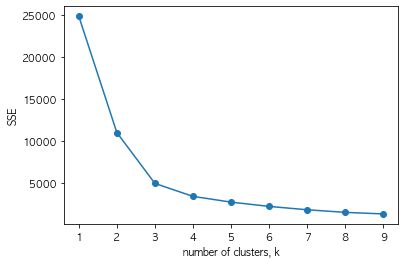

In [0]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

In [0]:
model = KMeans(n_clusters=3, init = 'k-means++', n_init = 1000, max_iter = 3000 ,random_state = 12)
model.fit(cluster_scale)
model.labels_

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       1, 0, 1, 1], dtype=int32)

In [0]:
pd.DataFrame(zip(trial_df.index, model.labels_), columns = ['동', '군집']).sort_values(by = '군집')

,동,군집
1,공릉1동,0
2,공릉2동,0
23,종로5.6가동,0
5,부암동,0
7,삼청동,0
11,상계3.4동,0
17,숭인2동,0
0,가회동,1
22,종로1.2.3.4가동,1
21,이화동,1
